In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

pd.pandas.set_option("display.max_columns", None)

In [28]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
dataset.shape

(891, 12)

In [30]:
# dropping the features with are not useful
dataset = dataset.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [31]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [32]:
# getting the nan values 

# one way of doing this 

# for feature in dataset.columns:
#     print(feature, dataset[feature].isnull().sum())

# second way of doing this 
nan_values = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
nan_values


['Age', 'Cabin', 'Embarked']

In [33]:
dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
# dropping the Cabin feature 

dataset = dataset.drop(["Cabin"], axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
# handling the nan values from the Age feature

median_value = dataset["Age"].median()
# median_value

dataset.Age = dataset["Age"].fillna(median_value)
dataset.Age.isnull().sum()

0

In [36]:
# handling the nan values form the Embarked feature

dataset["Embarked"] = dataset["Embarked"].fillna("Missing")
dataset.Embarked.isnull().sum()
 


0

In [37]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
# converting the categorical features into numerical feature

categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]
categorical_features

['Sex', 'Embarked']

In [39]:
dummies_var = pd.get_dummies(dataset[categorical_features], drop_first = True)
dummies_var.head()

,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1


In [40]:
dataset = pd.concat([dataset, dummies_var], axis = 1)

In [41]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [42]:
dataset = dataset.drop(["Sex", "Embarked"], axis = 1)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [43]:
# scaling the features


scaling_features = [feature for feature in dataset.columns if feature != "Survived"]
scaling_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_Missing',
 'Embarked_Q',
 'Embarked_S']

In [44]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(dataset[scaling_features])
dataset[scaling_features] = scalar.transform(dataset[scaling_features]) 
dataset.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Missing,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,0.0,1.0
1,1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0
2,1,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,1.0
3,1,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,1.0
4,0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,0.0,1.0
5,0,1.0,0.346569,0.000,0.000000,0.016510,1.0,0.0,1.0,0.0
6,0,0.0,0.673285,0.000,0.000000,0.101229,1.0,0.0,0.0,1.0
7,0,1.0,0.019854,0.375,0.166667,0.041136,1.0,0.0,0.0,1.0
8,1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,0.0,1.0
9,1,0.5,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0,0.0


In [45]:
X = dataset.iloc[:, 1:]
Y = dataset.Survived

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(Y_test, Y_pred))

[[92 18]
 [18 51]]


In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [53]:
# making model via knn-classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
# getting the error rate which is (1-precision)

error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, Y, cv = 10)
    error_rate.append(1-score.mean())
error_rate

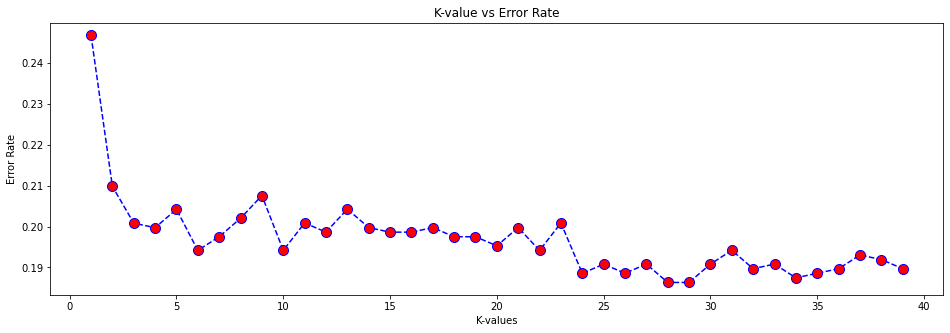

In [58]:
# plotting the graph between error rate and k-values 

plt.figure(figsize =(16, 5))
plt.plot(range(1, 40), error_rate, linestyle = "dashed", color = "blue", marker = "o", markerfacecolor = "red", markersize = 10)
plt.xlabel("K-values")
plt.ylabel("Error Rate")
plt.title("K-value vs Error Rate")
plt.show()


In [59]:
## since for the k = 28 the error rate is minimun so k = 28 

KNN = KNeighborsClassifier(n_neighbors = 28)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=28)

In [60]:
Y_pred_for_knn = KNN.predict(X_test)

In [61]:
Y_pred_for_knn

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [62]:
print(confusion_matrix(Y_test, Y_pred_for_knn))

[[104   6]
 [ 27  42]]


In [63]:
print(classification_report(Y_test, Y_pred_for_knn))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179

